# TP - DATA832
## Classification de pays selon le niveau d’aide nécessaire


*Réalisé par PRUVOST Jordan, étudiant en IDU4 à Polytech Annecy-Chambery*

---

## PARTIE I - VISUALISATION

### I - Importation des modules nécessaire à l'analyse :

In [2]:
import numpy as np
import pandas as pd
import scipy as s
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

NB : Scikit-learn sera importer pour chaque méthode utilisée dans la suite (ie: `from sklearn.ensemble import RandomForestClassifier` pour faire une randomForest, etc). Cela permettra donc de mieux comprendre ce qui est analysé à chaque fois.

---

### II - Importation des 'dataframes' utiles à l'étude :

In [3]:
df = pd.read_csv("datasets/Country-data.csv", sep=",")

df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Une fois les données importées, nous pouvons les visualiser et voir qu'il y a pas mal d'informations qui peuvent être utilisées. On va donc réaliser quelques opérations pour mieux les étudier par la suite.

---

### III - Calculs de certaines statistiques grâce à la bibliothèque python `pandas`

**Moyenne et variance des features :**

In [4]:
def moyenne(feature):
    # La 'feature' doit etre un type 'str'
    
    # Creation de la fonction 'moy' utile si on veut regarder pour une colonne précisée, cela rend le code plus adaptable
    return df[feature].mean()

print(moyenne('life_expec'))

70.55568862275449


Ici, il est donc possible de préciser la valeur de `feature` en mettant un type 'str' correspondant à la colonne désirer pour en obtenir la **moyenne**. 

In [5]:
def variance(feature):
    # La 'feature' doit etre un type 'str'
    
    # Creation de la fonction 'var' utile si on veut regarder pour une colonne précisée, cela rend le code plus adaptable
    return df[feature].var()

print(variance('life_expec'))

79.08850660125532


Ici, de la même manière que précedemment, il est donc possible de préciser la valeur de `feature` en mettant un type 'str' correspondant à la colonne désirer pour en obtenir la **variance**.

---

### IV - Visualisation de la distribution des valeurs pour chaque variable selon tous les pays

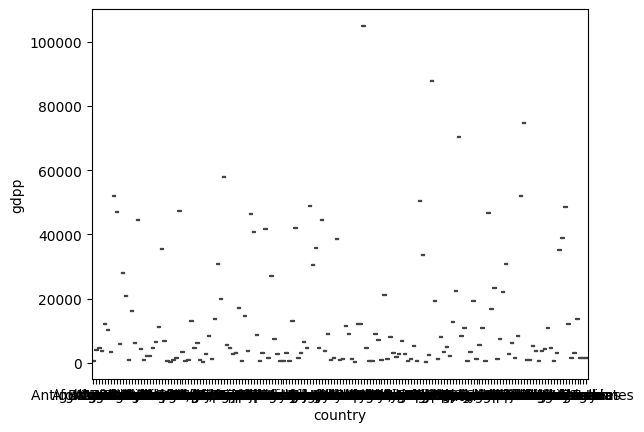

In [6]:
def distribution(feature):
    # La 'feature' doit etre un type 'str'
    
    # Creation de la fonction 'distribution', utile si on veut regarder pour une colonne précisée, cela rend le code plus adaptable
    sns.boxplot(x = 'country', y = feature, data = df)
    plt.show()
    
distribution('gdpp')

Ici, nous observons le résultat mais avec un mauvais rendu. Les valeurs en abscisse sont très peu lisible. Pour ce faire, nous allons agrandir le graphique et effectuer d'autres modifications secondaires comme suit :

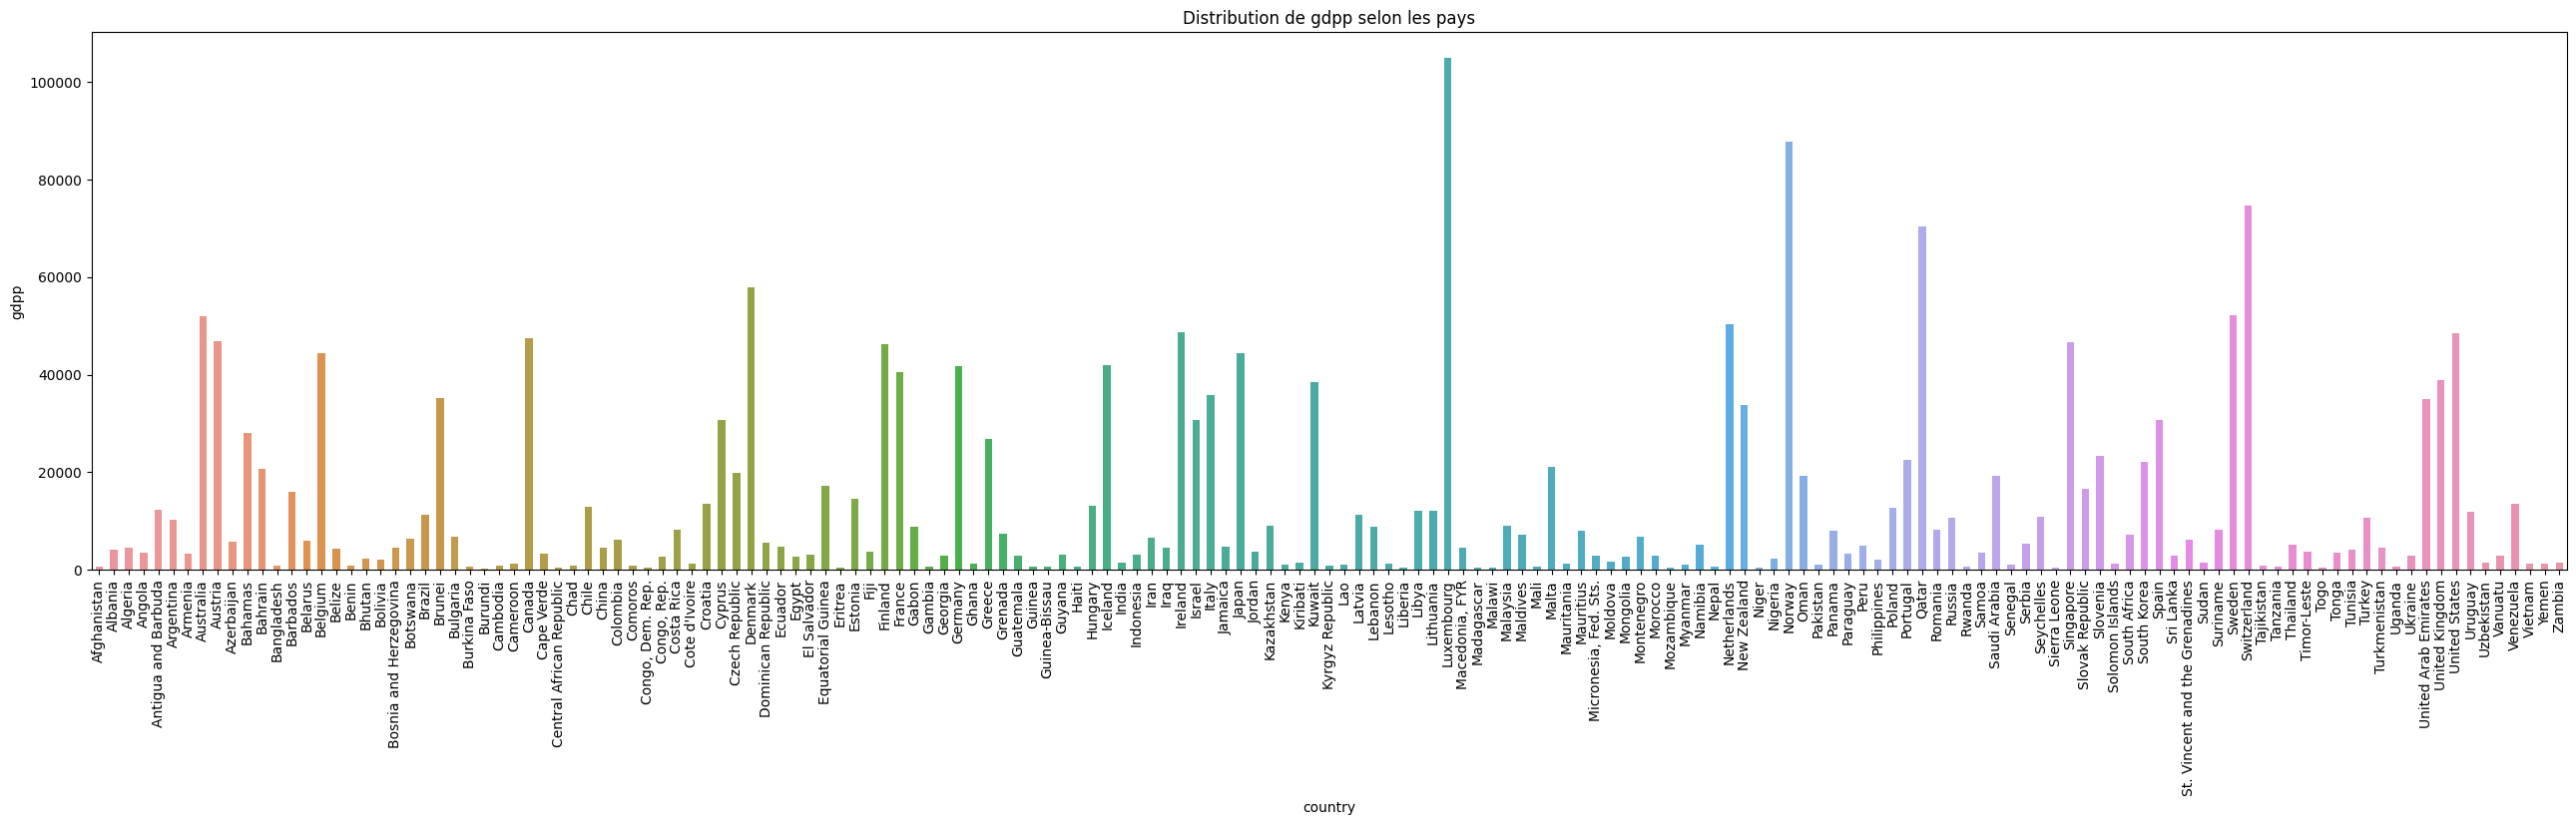

In [7]:
def wonderfulDistribution(feature):
    # La 'feature' doit etre un type 'str'
    
    # Creation de la fonction 'distribution', utile si on veut regarder pour une colonne précisée, cela rend le code plus adaptable
    # La fonction est ici plus complexe, mais le resultat sera bien plus clair
    
    # On change la taille du graphe pour que le rendu de l'axe des abscisse soit lisible
    plt.figure(figsize=(32,7))
    sns.barplot(x = 'country', y = feature, data = df, width = 0.5)
    plt.title('Distribution de ' + feature + ' selon les pays')
    
    # On paramètre l'axe x pour par exemple afficher les valeurs à la vertical pour ne pas qu'elle s'entrechoquent entre elles
    plt.gca().set_xticks(range(len(df['country'])))
    plt.xticks(rotation='vertical')
    
    # On affiche le rendu du graphe
    plt.show()
    
wonderfulDistribution('gdpp')

Nous avons ici un meilleur rendu, avec des barres pour une meilleure visualisation. Ici, j'ai donc utilisé la méthode `barplot` de `seaborn` pour faciliter la lecture.

---

### V - Histogramme des *X* pays ayant les valeurs les plus élevées

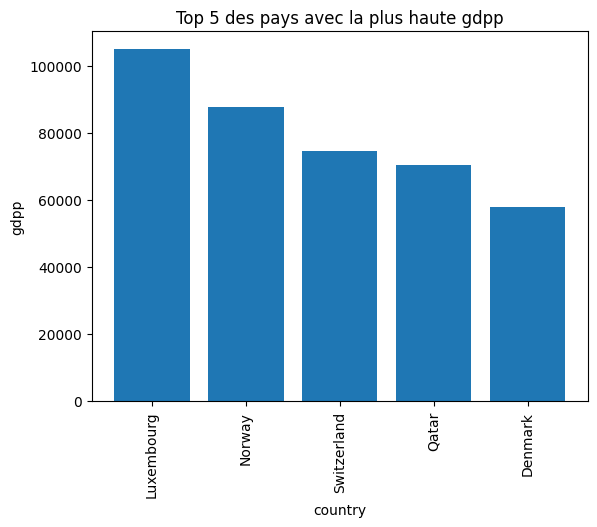

In [8]:
def plotTopX(df, feature, x = 10, ascending = False):
    # La 'feature' doit etre un type 'str'
    # x est fixé à 10 de base mais peut être modifié
    # ascending précise si on selectionne les X plus grosse ou les X plus faibles valeurs
    #   False = plus hautes  &  True = plus faibles
    
    # Tri des données en fonction de la feature selectionnée
    tri_df = df.sort_values(by = feature, ascending = ascending)
    
    # Selectionne les X meilleurs pays
    top_x = tri_df.iloc[:x]
    
    # Plot de l'histogramme
    plt.bar(top_x['country'], top_x[feature])
    plt.xticks(rotation = 90)
    plt.xlabel('country')
    plt.ylabel(feature)
    plt.title(f'Top {x} des pays avec la {"plus basse" if ascending else "plus haute"} {feature}')
    plt.show()

    
plotTopX(df, 'gdpp', x=5)

Nous observons donc les *X* pays avec la plus haute (ou plus basse) valeur de `feature` selectionnées. Nous pouvons ainsi modifier dans les paramètres de la fonction si on desire les plus hautes ou les plus basses en mettant respectivement 'False' ou 'True' sur `ascending`.

---

## PARTIE II - CHOIX D'UN ALGORITHME ET PIPELINE

### I - Approche de type "Pipeline"

D'abord, nous allons importer les outils de `scikit-learn` utile à l'étude des trois cas

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

Création de train et de test sur mon dataframe :

In [10]:
dfTemp = df.drop('country', axis=1)

train, test = train_test_split(dfTemp, test_size=0.2)

Création d'un pipeline avec les différentes étapes :

In [11]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Étape 1 - Prétraitement
    ('pca', PCA(n_components=2)), # Étape 2 - Réduction de dimension
    ('kmeans', KMeans(n_clusters=3)) # Étape 3 - Clustering
])

Entraînement du pipeline sur les données d'entraînement :

In [12]:
pipeline.fit(train)

C:\Users\jorda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3))])

Prédiction des clusters sur de nouvelles données :

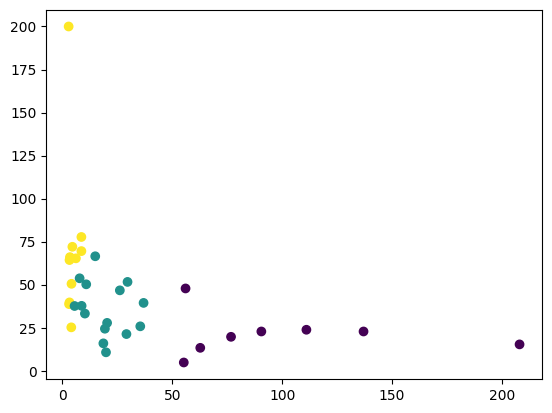

In [13]:
y_pred = pipeline.predict(test)
plt.scatter(test.iloc[:, 0], test.iloc[:, 1], c=y_pred)
plt.show()